In [1]:
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
import seaborn as sns
import itertools
import warnings
warnings.filterwarnings('ignore')
import matplotlib as mpl
from matplotlib.colors import ListedColormap
import pickle
from numpy.linalg import eigvals, eig
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

def f_deltar(deltar, J, delta, g, x):
    return delta * np.exp(-2 * np.sum(f_f(deltar, J, g, x) ** 2))

def f_f(deltar, J, g, x):
    return g / (np.sqrt(N) * w) * (f_E(deltar, J) +  J * np.cos(2 * np.pi * ks * x / N)) / (f_E(deltar, J) +  J * np.cos(2 * np.pi * ks * x / N) + (deltar ** 2) / w)

def f_J(deltar, J, delta, g, x):
    return 2 * np.sum(f_f(deltar, J, g, x) * (2 * g / np.sqrt(N) - w * f_f(deltar, J, g, x)) * np.cos(2 * np.pi * ks * x / N))

def f_E(deltar, J):
    return np.sqrt(deltar ** 2 + J ** 2)

def Gamma(deltar, J, g, x):
    f = f_f(deltar, J, g, x)
    return np.sum(np.abs(-deltar * f * (np.exp(1j * 2 * np.pi * ks * x / N) * (deltar + f_E(deltar, J)) - J) + (g / np.sqrt(N) - w * f) * (J + np.exp(1j * 2 * np.pi * ks * x / N) * (deltar + f_E(deltar, J))))) / N

def f_energy(deltar, J, g, x):
    f = f_f(deltar, J, g, x)
    
    return -f_E(deltar, J) + 2 * np.sum(f * (w * f - 2 * g / np.sqrt(N)))
    #return -f_E(deltar, J) 

def factor(deltar, J):
    num = (deltar + f_E(deltar, J)) ** 2 - J ** 2
    den = (deltar + f_E(deltar, J)) ** 2 + J ** 2
    
    return num / den

def f_fn(f):
    return np.array([np.sum(f * np.exp(-2 * 1j * np.pi * ks * (n - N / 2) / N)) / np.sqrt(N) for n in range(N)])

def a(deltar, J):
    if J == 0.0:
        return 1
    else:
        aux = (deltar + f_E(deltar, J)) / J

        return aux / (np.sqrt(aux ** 2 + 1))

def b(deltar, J):
    if J == 0.0:
        return 0
    else:
        aux = (deltar + f_E(deltar, J)) / J

        return 1 / (np.sqrt(aux ** 2 + 1))
    
def numberofphotons_GS(deltar, J, g, x):
    f1 = f_f(analisis[x][delta][g][0], analisis[x][delta][g][1], g, x) 
    f2 = f_f(analisis[x][delta][g][0], analisis[x][delta][g][1], g, x) * np.exp(1j * 2 * np.pi * ks * x / N)
    
    fn1 = f_fn(f1)
    fn2 = f_fn(f2)
    
    return np.abs(fn1) ** 2 + np.abs(fn2) ** 2 + 4 * a(deltar, J) * b(deltar, J) * np.real(fn1 * np.conj(fn2))

def f_cos(deltar, J):
    num = deltar + f_E(deltar, J)
    den = np.sqrt(num ** 2 + J ** 2)
    
    return num / den

def f_sin(deltar, J):
    num  = J
    den  = np.sqrt((deltar + f_E(deltar, J)) ** 2 + J ** 2)
    
    return num / den

def numberofphotons(v, f, deltar, J, x):
    cos = f_cos(deltar, J)
    sin = f_sin(deltar, J)
    
    v0 = v[0]
    v1 = v[1]
    vn = f_fn(v[2:])
    
    fn1 = f_fn(f)
    fn2 = f_fn(f * np.exp(1j * 2 * np.pi * ks * x / N))
    
    t1 = np.abs(fn1) ** 2 + np.abs(fn2) ** 2
    
    t2 = -v0 * np.conj(vn) * (sin * fn1 + cos * fn2) - v1 * np.conj(vn) * (cos * fn1 + sin * fn2)
    
    t3 = -v0 * vn * (sin * np.conj(fn1) + cos * np.conj(fn2)) - v1 * vn * (cos * np.conj(fn1) + sin * np.conj(fn2))
    
    t4 = 2 * v0 * v1 * (fn1 * np.conj(fn2) + fn2 * np.conj(fn1))
    
    t5 = 2 * cos * sin * (1 - np.abs(v0) ** 2 - np.abs(v1) ** 2) * (fn1 * np.conj(fn2) + fn2 * np.conj(fn1))
    
    t6 = np.abs(vn) ** 2
    
    return t1 + t2 + t3 + t4 + t5 + t6

def numberofphotons_rwa(v):
    v0 = v[0]
    v1 = v[1]
    vn = f_fn(v[2:])
    
    return np.abs(vn) ** 2

class Eigensystem:
    def __init__(self, vals, vects):
        self.vals = vals
        self.vects = vects
        self.size = len(vals)

In [2]:
w0 = 1.0
gamma = 0.4
N = 100
ks = np.arange(N)
w = w0 - 2 * gamma * np.cos(2 * np.pi / N * ks)
xs = np.arange(0.0, 21.0, 1.0)
deltas = np.arange(0.1, 2.1, 0.1)
gs = np.arange(0.0, 0.51, 0.01)

In [3]:
f = open('analisis/analisis.pk', 'rb')
analisis = pickle.load(f)
f.close()

f = open('/Users/juan/Desktop/Google Drive/Juan (1)/single-qubit/analisis/analisis.pk', 'rb')
analisis1 = pickle.load(f)
f.close()

In [4]:
f = open('analisis/eigenanalisis_eff.pk', 'rb')
eigen_eff = pickle.load(f)
f.close()

f = open('analisis/eigenanalisis_rwa.pk', 'rb')
eigen_rwa = pickle.load(f)
f.close()

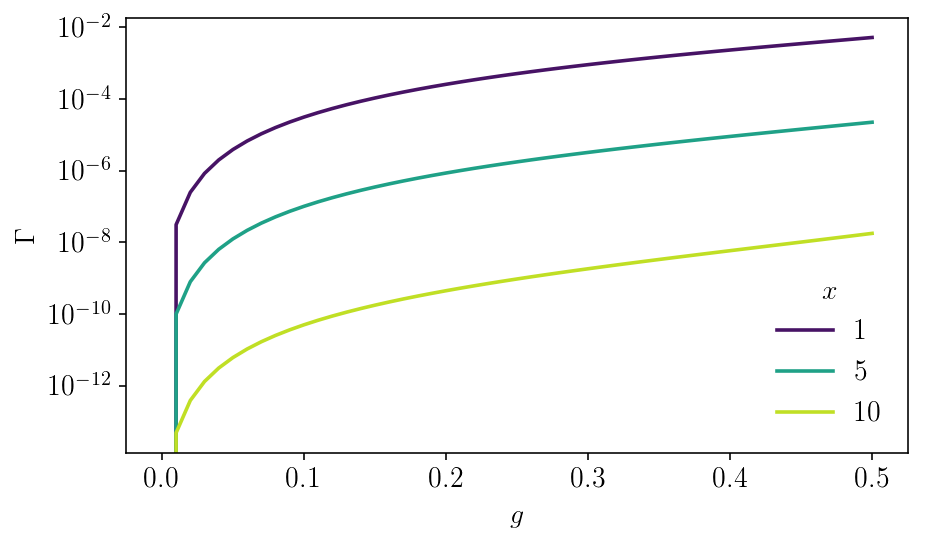

In [5]:
plt.rcParams['figure.figsize'] = 7, 4
plt.rcParams['lines.linewidth'] = 1.8
plt.rcParams['font.size'] = 14

palette = itertools.cycle(sns.color_palette("viridis", 20))
c1 = next(palette)
for n in range(10):
    next(palette)    
c2 = next(palette)
for n in range(6):
    next(palette)    
c3 = next(palette)

cs = [c1, c2, c3]

delta = 1.1
gen = [1, 5, 10]

sns.set_palette(sns.color_palette("viridis", len(gen)))

for x, c in zip(gen, cs):
    plt.plot([g for g in analisis[x][delta].keys()], [Gamma(val[0], val[1], g, x) for g, val in analisis[x][delta].items()], label = str(x), c = c)
    
plt.ylabel(r'$\Gamma$')
plt.xlabel(r'$g$')
plt.yscale('log')
plt.legend(title = r'$x$', loc = 'lower right', frameon = False)

plt.savefig('figures/2q_gamma_with_g.pdf', bbox_inches = 'tight')
plt.show()

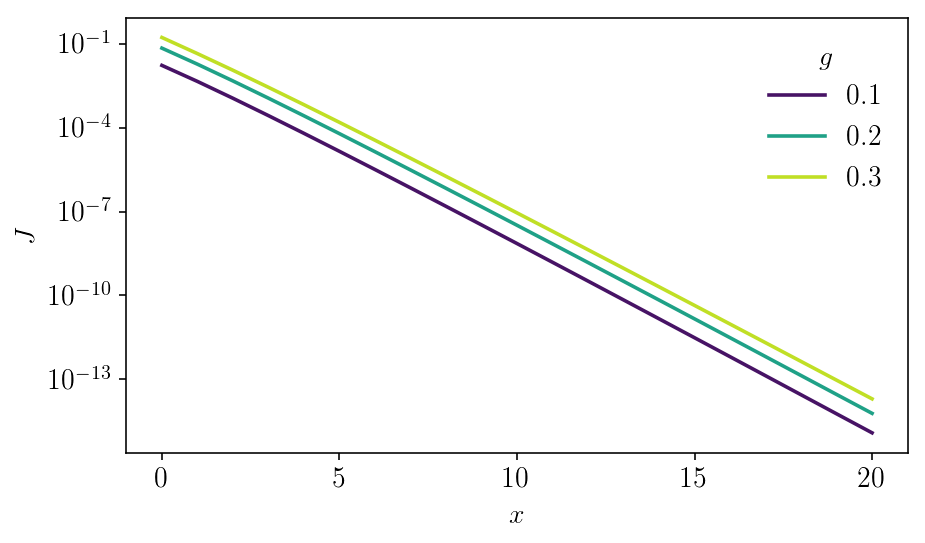

In [6]:
plt.rcParams['figure.figsize'] = 7, 4
plt.rcParams['lines.linewidth'] = 1.8
plt.rcParams['font.size'] = 14

palette = itertools.cycle(sns.color_palette("viridis", 20))
c1 = next(palette)
for n in range(10):
    next(palette)    
c2 = next(palette)
for n in range(6):
    next(palette)    
c3 = next(palette)

cs = [c1, c2, c3]

delta = 1.1
gen = [0.1, 0.2, 0.3]
sns.set_palette(sns.color_palette("viridis", len(gen)))

for g, c in zip(gen, cs):
    plt.plot([x for x in analisis.keys()], [val[delta][g][1] for val in analisis.values()], label = str(g), c = c)
     
plt.ylabel(r'$J$')
plt.xlabel(r'$x$')
plt.yscale('log')
plt.legend(title = r'$g$', loc = 'upper right', frameon = False)
plt.xticks(np.arange(0, 25, 5))

plt.savefig('figures/2q_J_with_x.pdf', bbox_inches = 'tight')
plt.show()

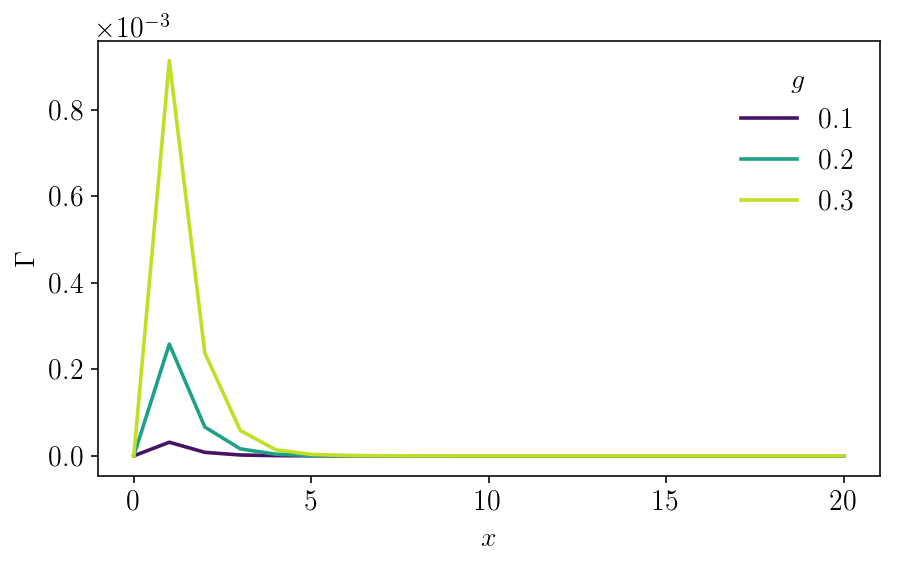

In [7]:
plt.rcParams['figure.figsize'] = 7, 4
plt.rcParams['lines.linewidth'] = 1.8
plt.rcParams['font.size'] = 14

palette = itertools.cycle(sns.color_palette("viridis", 20))
c1 = next(palette)
for n in range(10):
    next(palette)    
c2 = next(palette)
for n in range(6):
    next(palette)    
c3 = next(palette)

cs = [c1, c2, c3]

delta = 1.1
gen = [0.1, 0.2, 0.3]
sns.set_palette(sns.color_palette("viridis", len(gen)))

for g, c in zip(gen, cs):
    plt.plot([x for x in analisis.keys()], [Gamma(val[delta][g][0], val[delta][g][1], g, x) for x, val in analisis.items()], label = str(g), c = c)

plt.ylabel(r'$\Gamma$')
plt.xlabel(r'$x$')
plt.legend(title = r'$g$', loc = 'upper right', frameon = False)
plt.xticks(np.arange(0, 25, 5))
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

plt.savefig('figures/2q_gamma_with_x.pdf', bbox_inches = 'tight')
plt.show()

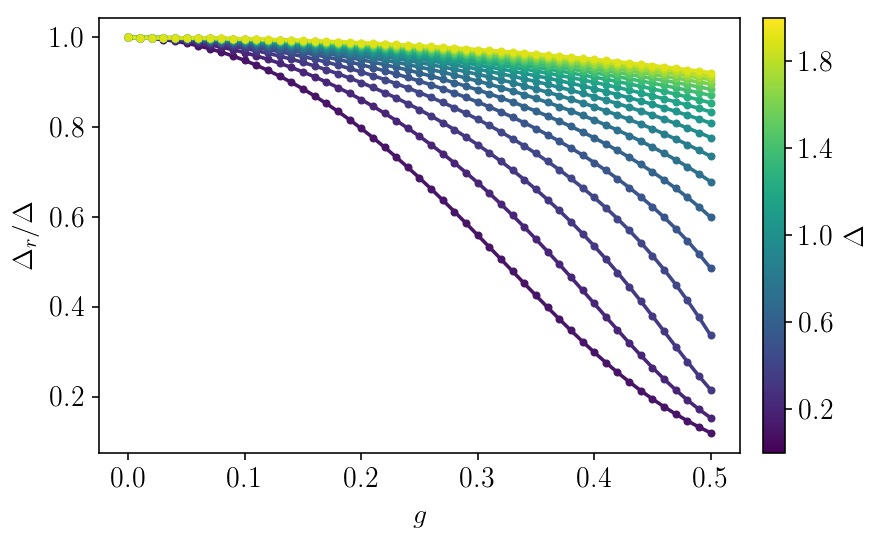

In [8]:
plt.rcParams['figure.figsize'] = 7, 4
plt.rcParams['lines.linewidth'] = 1.8
plt.rcParams['font.size'] = 14
sns.set_palette(sns.color_palette("viridis", len(analisis1.keys())))

x = 20

gen = [delta for delta in analisis1.keys()]
sns.set_palette(sns.color_palette("viridis", len(gen)))

for delta in gen:
    plt.plot([g for g in analisis[x][delta].keys()], [val[0] / delta for val in analisis[x][delta].values()])
    
for delta in gen:
    plt.plot([g for g in analisis[x][delta].keys()], [analisis1[delta][g] / delta for g in analisis[x][delta].keys()], lw = 0, marker = 'o', ms = 3)
    
plt.ylabel(r'$\Delta_r / \Delta$')
plt.xlabel(r'$g$')
#for side color bar

cmap = ListedColormap(sns.color_palette('viridis', 10 * len(deltas)))
norm = mpl.colors.Normalize(vmin = 0,vmax = 2)
sm = plt.cm.ScalarMappable(cmap = cmap, norm = norm)
sm.set_array([])
plt.colorbar(sm, label = r'$\Delta$', ticks = (np.arange(0.2, 1.81, 0.4)), pad = 0.03)

plt.savefig('figures/2q_delta_renorm_with_g.pdf', bbox_inches = 'tight')
plt.show()

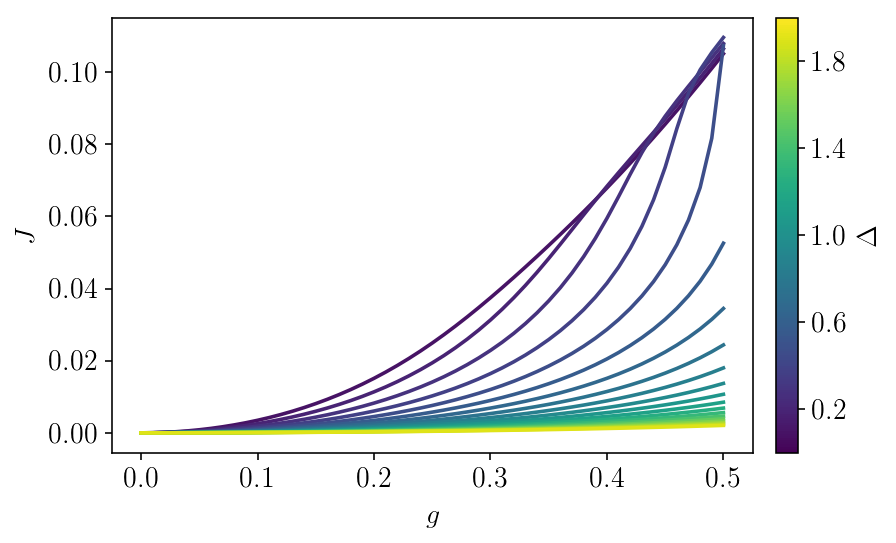

In [9]:
plt.rcParams['figure.figsize'] = 7, 4
plt.rcParams['lines.linewidth'] = 1.8
plt.rcParams['font.size'] = 14
sns.set_palette(sns.color_palette("viridis", len(deltas)))

x = 3

for delta in analisis[x].keys():
    plt.plot([g for g in analisis[x][delta].keys()], [val[1] for val in analisis[x][delta].values()], label = str(delta))

plt.ylabel(r'$J$')
plt.xlabel(r'$g$')
#plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

#for side color bar

cmap = ListedColormap(sns.color_palette('viridis', 10 * len(deltas)))
norm = mpl.colors.Normalize(vmin = 0,vmax = 2)
sm = plt.cm.ScalarMappable(cmap = cmap, norm = norm)
sm.set_array([])
plt.colorbar(sm, label = r'$\Delta$', ticks = (np.arange(0.2, 1.81, 0.4)), pad = 0.03)

plt.savefig('figures/2q_J_with_g.pdf', bbox_inches = 'tight')
plt.show()

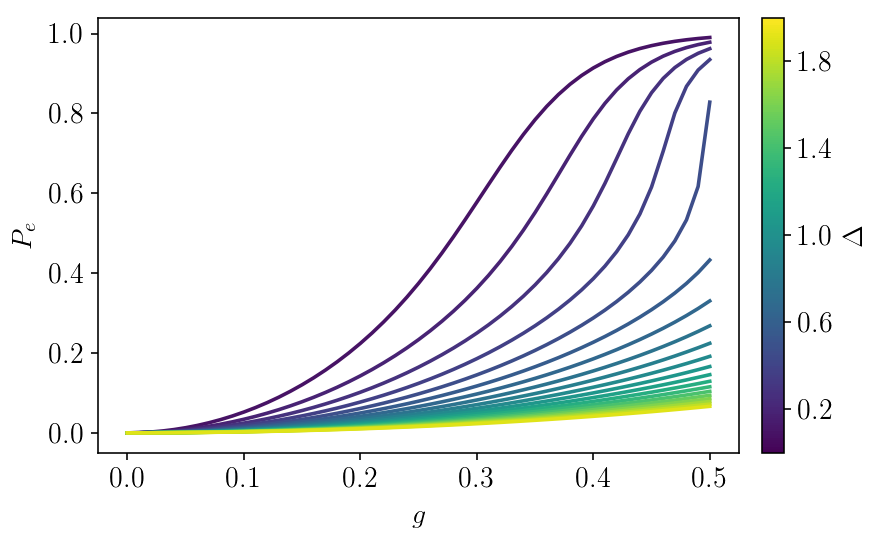

In [10]:
plt.rcParams['figure.figsize'] = 7, 4
plt.rcParams['lines.linewidth'] = 1.8
plt.rcParams['font.size'] = 14
sns.set_palette(sns.color_palette("viridis", len(deltas)))

x = 3

for delta in analisis[x].keys():
    plt.plot([g for g in analisis[x][delta].keys()], [1 - (val[0] / delta * factor(val[0], val[1])) for val in analisis[x][delta].values()], label = round(delta, 2))
    
plt.ylabel(r'$P_e$')
plt.xlabel(r'$g$')
#for side color bar

cmap = ListedColormap(sns.color_palette('viridis', 10 * len(deltas)))
norm = mpl.colors.Normalize(vmin = 0,vmax = 2)
sm = plt.cm.ScalarMappable(cmap = cmap, norm = norm)
sm.set_array([])
plt.colorbar(sm, label = r'$\Delta$', ticks = (np.arange(0.2, 1.81, 0.4)), pad = 0.03)

plt.savefig('figures/2q_prob_excited.pdf', bbox_inches = 'tight')
plt.show()

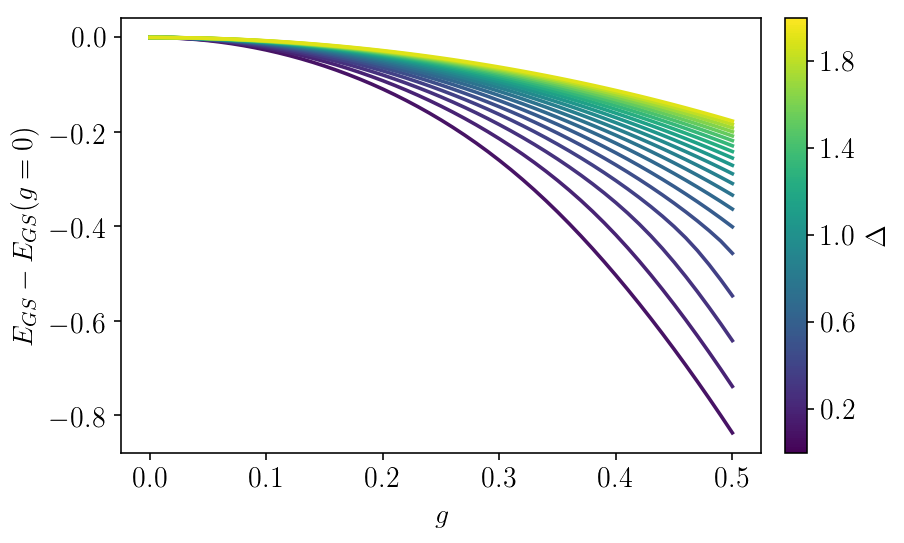

In [11]:
plt.rcParams['figure.figsize'] = 7, 4
plt.rcParams['lines.linewidth'] = 1.8
plt.rcParams['font.size'] = 14
sns.set_palette(sns.color_palette("viridis", len(deltas)))

x = 3

for delta in analisis[x].keys():
    plt.plot([g for g in analisis[x][delta].keys()], [f_energy(val[0], val[1], g, x) + delta for g, val in analisis[x][delta].items()], label = round(delta, 2))
    
plt.ylabel(r'$E_{GS} - E_{GS}(g = 0)$')
plt.xlabel(r'$g$')

#for side color bar

cmap = ListedColormap(sns.color_palette('viridis', 10 * len(deltas)))
norm = mpl.colors.Normalize(vmin = 0,vmax = 2)
sm = plt.cm.ScalarMappable(cmap = cmap, norm = norm)
sm.set_array([])
plt.colorbar(sm, label = r'$\Delta$', ticks = (np.arange(0.2, 1.81, 0.4)), pad = 0.03)

plt.savefig('figures/2q_gs_energy.pdf', bbox_inches = 'tight')
plt.show()

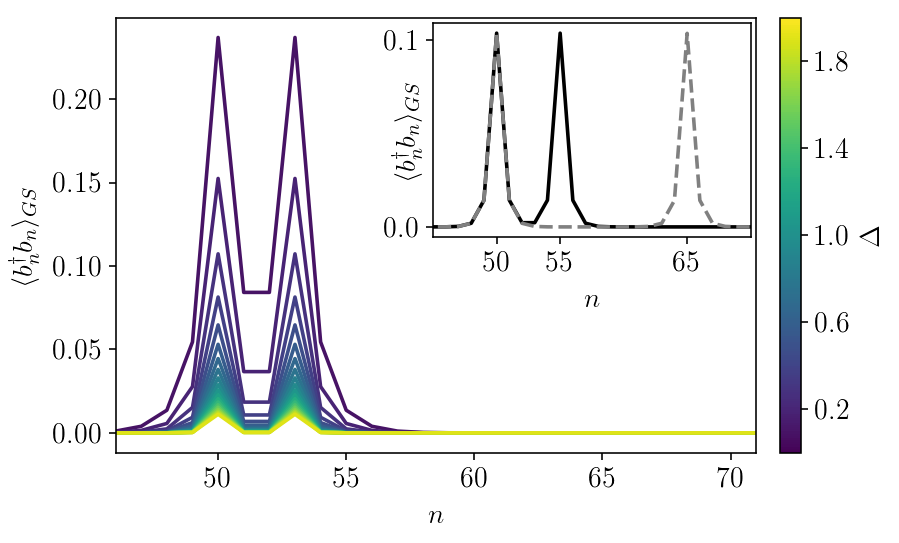

In [12]:
plt.rcParams['figure.figsize'] = 7, 4
plt.rcParams['lines.linewidth'] = 1.8
plt.rcParams['font.size'] = 14
sns.set_palette(sns.color_palette("viridis", len(deltas)))

x = 3.0
g = 0.3


fig, ax1 = plt.subplots()

for delta in analisis[x].keys():
    deltar = analisis[x][delta][g][0]
    J = analisis[x][delta][g][1]
    numofphotons = numberofphotons_GS(deltar, J, g, x)
    
    ax1.plot([n for n in range(N)], numofphotons , label = delta)

plt.ylabel(r'$\langle b_n^\dagger b_n\rangle_{GS}$')
plt.xlabel(r'$n$')
plt.xlim(N // 2 + x // 2 - 5, N // 2 + x // 2 + 20)
#plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
#plt.title(r'$g = $' + str(g) + '          ' + r'$x = $' + str(x))
#for side color bar


cmap = ListedColormap(sns.color_palette('viridis', 10 * len(deltas)))
norm = mpl.colors.Normalize(vmin = 0,vmax = 2)
sm = plt.cm.ScalarMappable(cmap = cmap, norm = norm)
sm.set_array([])
plt.colorbar(sm, label = r'$\Delta$', ticks = (np.arange(0.2, 1.81, 0.4)), pad = 0.03)

# These are in unitless percentages of the figure size. (0,0 is bottom left)
left, bottom, width, height = [0.44, 0.5, 0.315, 0.37]
ax2 = fig.add_axes([left, bottom, width, height])

delta = 0.3
x = 5.0

deltar = analisis[x][delta][g][0]
J = analisis[x][delta][g][1]
numofphotons = numberofphotons_GS(deltar, J, g, x)

ax2.plot([n for n in range(N)], numofphotons, c = 'black')

x = 15.0

deltar = analisis[x][delta][g][0]
J = analisis[x][delta][g][1]
numofphotons = numberofphotons_GS(deltar, J, g, x)

ax2.plot([n for n in range(N)], numofphotons, c = 'grey', ls = 'dashed')

plt.xlim(45, 70)
plt.xlabel(r'$n$')
plt.ylabel(r'$\langle b_n^\dagger b_n\rangle_{GS}$', labelpad = -22)
plt.yticks([0.0, 0.1])
plt.xticks([50, 55, 65])

plt.savefig('figures/2q_nphotons_g=03_x=3.pdf', bbox_inches = 'tight')
plt.show()

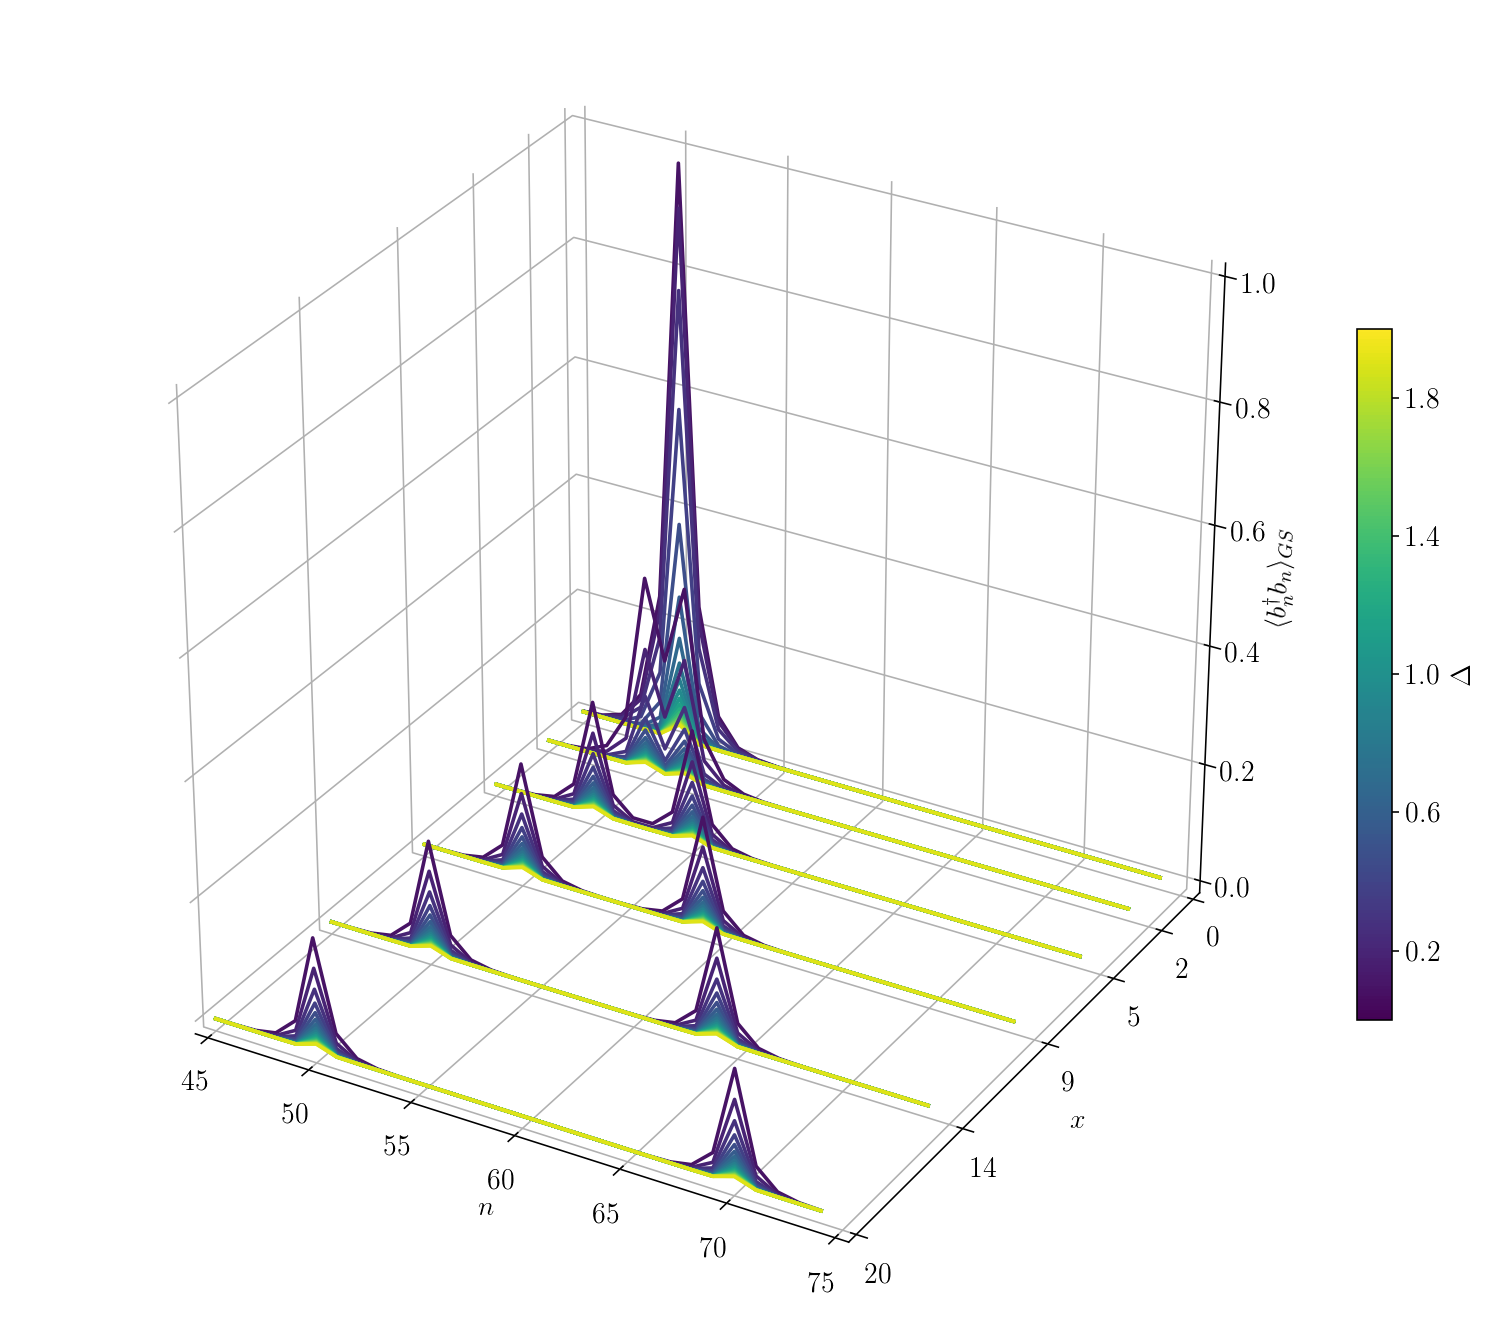

In [13]:
plt.rcParams['figure.figsize'] = 12, 12
plt.rcParams['lines.linewidth'] = 1.8
plt.rcParams['font.size'] = 14
sns.set_palette(sns.color_palette("viridis", len(deltas)))

from mpl_toolkits import mplot3d
fig = plt.figure()
ax = plt.axes(projection='3d')

#delta = 1.0
g = 0.3

gen = [x for x, n in zip(analisis.keys(), range(len(analisis.keys()))) if n % 3 == 0]
gen = [0, 2, 5, 9, 14, 20]

for x in gen:
    for delta in analisis[x].keys():
        deltar = analisis[x][delta][g][0]
        J = analisis[x][delta][g][1]
        numofphotons = numberofphotons_GS(deltar, J, g, x)

        ax.plot([n for n in range(N // 2 - 5, N // 2 + 25)], [x for n in range(N // 2 - 5, N // 2 + 25)], numofphotons[N // 2 - 5: N // 2 + 25] , label = x)
    
ax.set_zlabel(r'$\langle b_n^\dagger b_n\rangle_{GS}$')
ax.set_ylabel(r'$x$')
ax.set_xlabel(r'$n$')
ax.set_xlim(N // 2 - 5, N // 2 + 25)
ax.set_ylim(0, gen[-1])
ax.set_zlim(0, 1.0)
ax.set_yticks(gen)
#plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
#plt.title(r'$g = $' + str(g))
ax.invert_yaxis()

# make the panes transparent
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

#for side color bar

cmap = ListedColormap(sns.color_palette('viridis', 10 * len(deltas)))
norm = mpl.colors.Normalize(vmin = 0,vmax = 2)
sm = plt.cm.ScalarMappable(cmap = cmap, norm = norm)
sm.set_array([])
cax = fig.add_axes([0.9, 0.3, 0.02, 0.4])
fig.colorbar(sm, cax = cax, label = r'$\Delta$', ticks = (np.arange(0.2, 1.81, 0.4)), pad = 0.03)

plt.savefig('figures/2q_nphotons_g=03.pdf', bbox_inches = 'tight')
plt.show()

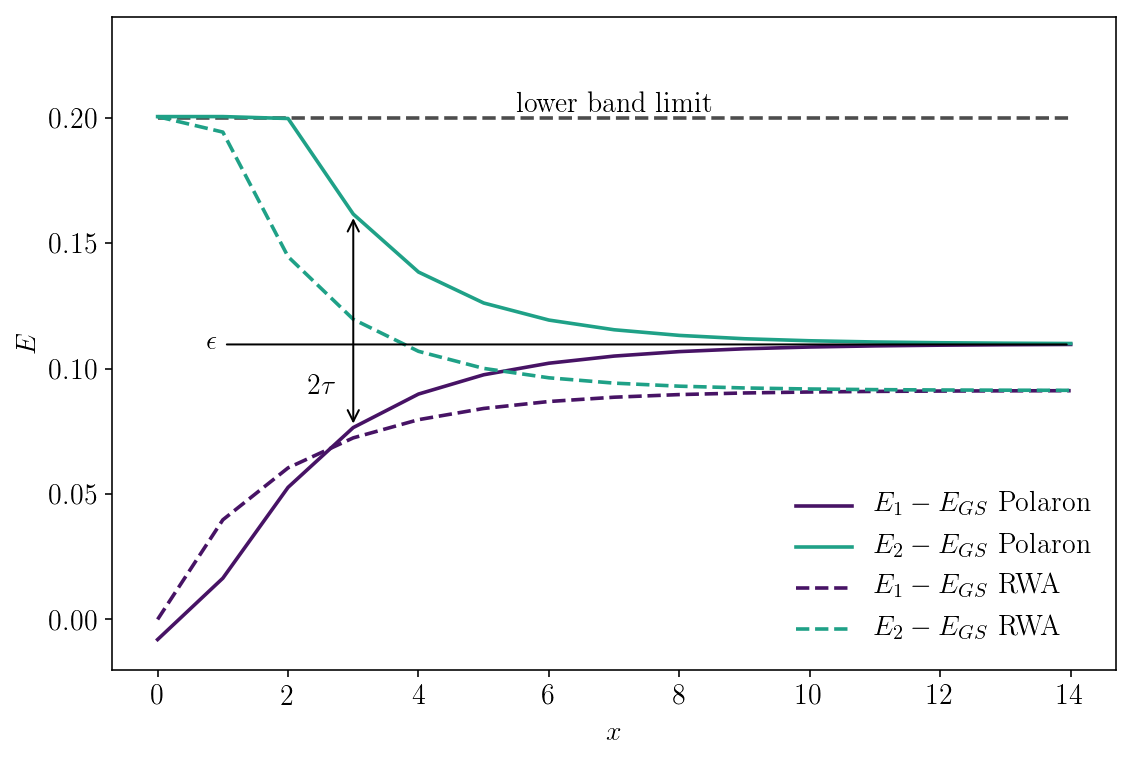

In [26]:
plt.rcParams['figure.figsize'] = 9, 6
plt.rcParams['lines.linewidth'] = 1.8
plt.rcParams['font.size'] = 14

palette = itertools.cycle(sns.color_palette("viridis", 20))
c1 = next(palette)
for n in range(10):
    next(palette)
    
c2 = next(palette)

xs = np.arange(0, 15, 1)
delta = 0.3
g = 0.3

boundT = []
boundT_rwa = []

for x in xs:
    vals = eigen_eff[x][delta][g].vals
    
    vals_rwa = eigen_rwa[x][delta][g].vals

    f = f_f(analisis[x][delta][g][0], analisis[x][delta][g][1], g, x)
    zero_point = 2 * np.sum(f * (w * f - 2 * g / np.sqrt(N)))
    E_gs = f_energy(analisis[x][delta][g][0], analisis[x][delta][g][1] , g, x)
    
    boundT.append((x, vals[0] - E_gs + zero_point, vals[1] - E_gs + zero_point))
    boundT_rwa.append((x, vals_rwa[0] + delta, vals_rwa[1] + delta))

plt.plot([x for x in xs], [w0 - 2 * gamma for x in xs], c = (0.3, 0.3, 0.3), ls = 'dashed')    

plt.plot([val[0] for val in boundT], [val[1] for val in boundT], label = r'$E_1 - E_{GS}$' + ' Polaron', c = c1) #E1
plt.plot([val[0] for val in boundT], [val[2] for val in boundT], label = r'$E_2 - E_{GS}$' + ' Polaron', c = c2) #E2

plt.plot([val[0] for val in boundT_rwa], [val[1] for val in boundT_rwa], label = r'$E_1 - E_{GS}$' + ' RWA', c = c1, ls = 'dashed') #E1
plt.plot([val[0] for val in boundT_rwa], [val[2] for val in boundT_rwa], label = r'$E_2 - E_{GS}$' + ' RWA', c = c2, ls = 'dashed') #E2

plt.text(5.5, 0.202, 'lower band limit', color = 'black')

plt.annotate(s = '', xy = (3, boundT[3][2]), xytext = (3,boundT[3][1]), arrowprops = dict(arrowstyle = '<->'))
plt.text(3 - 0.7, 0.09, r'$2\tau$')

plt.annotate(s = '', xy = (boundT[-1][0], boundT[-1][1]), xytext = (1, boundT[-1][1]), arrowprops = dict(arrowstyle = '-'))
plt.text(0.75, boundT[-1][1] - 0.002, r'$\epsilon$')

plt.ylim(-0.02, 0.24)
plt.ylabel(r'$E$')
plt.xlabel(r'$x$')
plt.legend(frameon = False)

plt.savefig('figures/2q_energy_split.pdf', bbox_inches = 'tight')
plt.show()

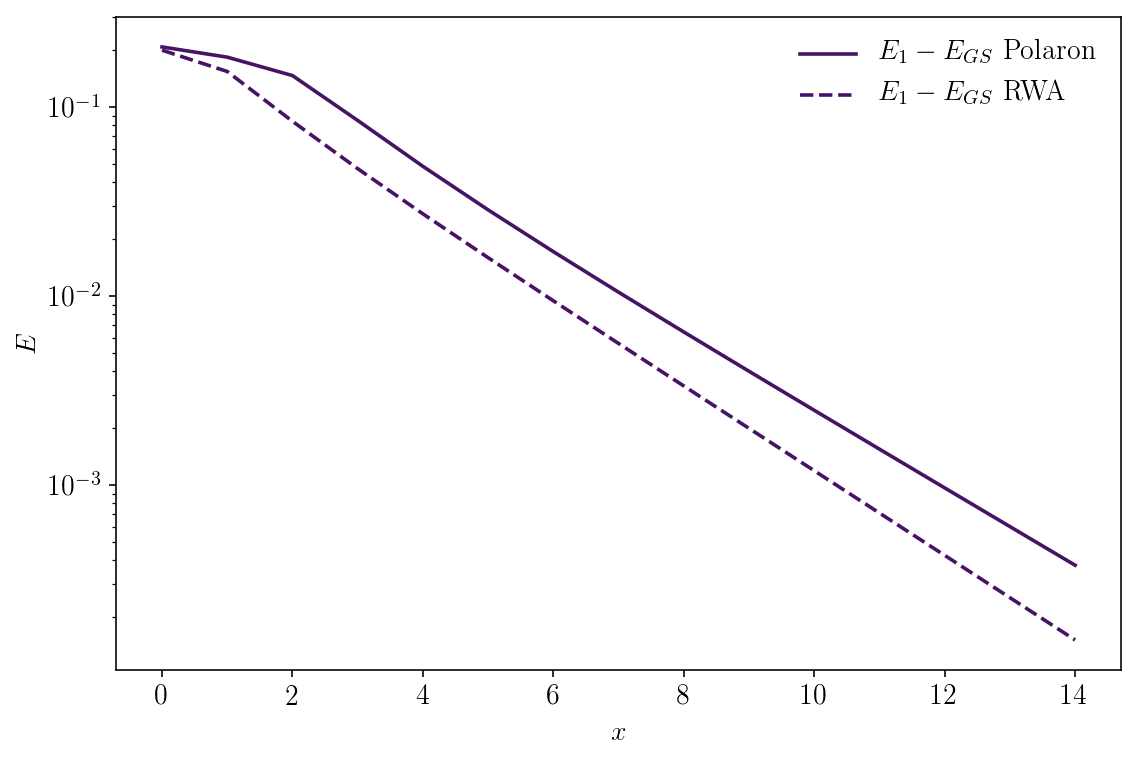

In [15]:
plt.rcParams['figure.figsize'] = 9, 6
plt.rcParams['lines.linewidth'] = 1.8
plt.rcParams['font.size'] = 14

palette = itertools.cycle(sns.color_palette("viridis", 20))
c1 = next(palette)
for n in range(10):
    next(palette)
    
c2 = next(palette)

xs = np.arange(0, 15, 1)
delta = 0.3
g = 0.3

boundT = []
boundT_rwa = []

for x in xs:
    vals = eigen_eff[x][delta][g].vals
    
    vals_rwa = eigen_rwa[x][delta][g].vals

    f = f_f(analisis[x][delta][g][0], analisis[x][delta][g][1], g, x)
    zero_point = 2 * np.sum(f * (w * f - 2 * g / np.sqrt(N)))
    E_gs = f_energy(analisis[x][delta][g][0], analisis[x][delta][g][1] , g, x)
    
    boundT.append((x, vals[0] - E_gs + zero_point, vals[1] - E_gs + zero_point))
    boundT_rwa.append((x, vals_rwa[0] + delta, vals_rwa[1] + delta))

#plt.plot([x for x in xs], [w0 - 2 * gamma for x in xs], c = (0.3, 0.3, 0.3), ls = 'dashed')    

plt.plot([val[0] for val in boundT], [val[2] - val[1] for val in boundT], label = r'$E_1 - E_{GS}$' + ' Polaron', c = c1) #E1
#plt.plot([val[0] for val in boundT], [val[2] for val in boundT], label = r'$E_2 - E_{GS}$' + ' Polaron', c = c2) #E2

plt.plot([val[0] for val in boundT_rwa], [val[2] - val[1] for val in boundT_rwa], label = r'$E_1 - E_{GS}$' + ' RWA', c = c1, ls = 'dashed') #E1
#plt.plot([val[0] for val in boundT_rwa], [val[2] for val in boundT_rwa], label = r'$E_2 - E_{GS}$' + ' RWA', c = c2, ls = 'dashed') #E2

#plt.text(5.0, 0.202, 'lower band limit', color = (0.3, 0.3, 0.3))

#plt.ylim(-0.02, 0.24)
plt.ylabel(r'$E$')
plt.xlabel(r'$x$')
plt.legend(frameon = False)
plt.yscale('log')


plt.show()

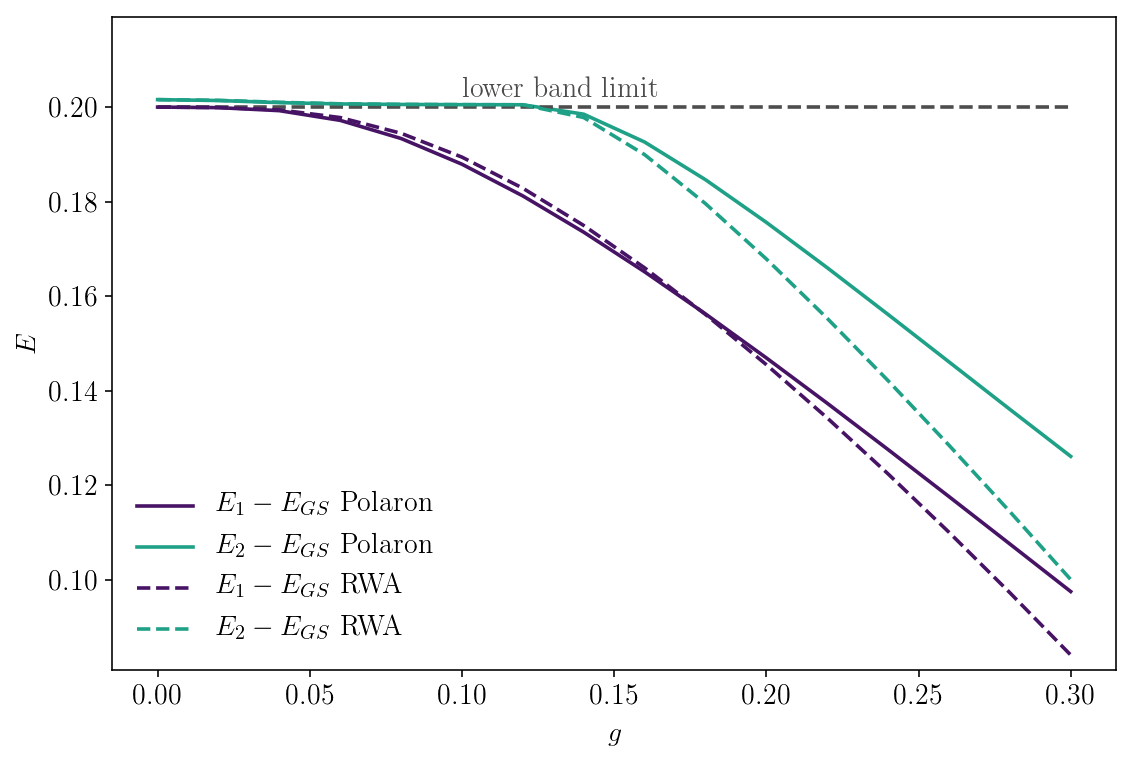

In [16]:
plt.rcParams['figure.figsize'] = 9, 6
plt.rcParams['lines.linewidth'] = 1.8
plt.rcParams['font.size'] = 14

palette = itertools.cycle(sns.color_palette("viridis", 20))
c1 = next(palette)
for n in range(10):
    next(palette)
    
c2 = next(palette)

x = 5
delta = 0.3
gs = np.arange(0, 0.32, 0.02)

boundT = []
boundT_rwa = []

for g in gs:
    vals = eigen_eff[x][delta][g].vals
    vals_rwa = eigen_rwa[x][delta][g].vals

    f = f_f(analisis[x][delta][g][0], analisis[x][delta][g][1], g, x)
    zero_point = 2 * np.sum(f * (w * f - 2 * g / np.sqrt(N)))
    E_gs = f_energy(analisis[x][delta][g][0], analisis[x][delta][g][1] , g, x)
    
    boundT.append((g, vals[0] - E_gs + zero_point, vals[1] - E_gs + zero_point, w0 - 2 * gamma))
    boundT_rwa.append((g, vals_rwa[0] + delta, vals_rwa[1] + delta))

plt.plot([val[0] for val in boundT], [val[1] for val in boundT], label = r'$E_1 - E_{GS}$' + ' Polaron', c = c1) #E1
plt.plot([val[0] for val in boundT], [val[2] for val in boundT], label = r'$E_2 - E_{GS}$' + ' Polaron', c = c2) #E2
plt.plot([val[0] for val in boundT], [val[3] for val in boundT], c = (0.3, 0.3, 0.3), ls = 'dashed') #E2

plt.plot([val[0] for val in boundT_rwa], [val[1] for val in boundT_rwa], label = r'$E_1 - E_{GS}$' + ' RWA', c = c1, ls = 'dashed') #E1
plt.plot([val[0] for val in boundT_rwa], [val[2] for val in boundT_rwa], label = r'$E_2 - E_{GS}$' + ' RWA', c = c2, ls = 'dashed') #E2

plt.text(0.10, 0.202, 'lower band limit', color = (0.3, 0.3, 0.3))

plt.ylim(0.081, 0.219)

plt.ylabel(r'$E$')
plt.xlabel(r'$g$')
plt.legend(frameon = False)
plt.show()

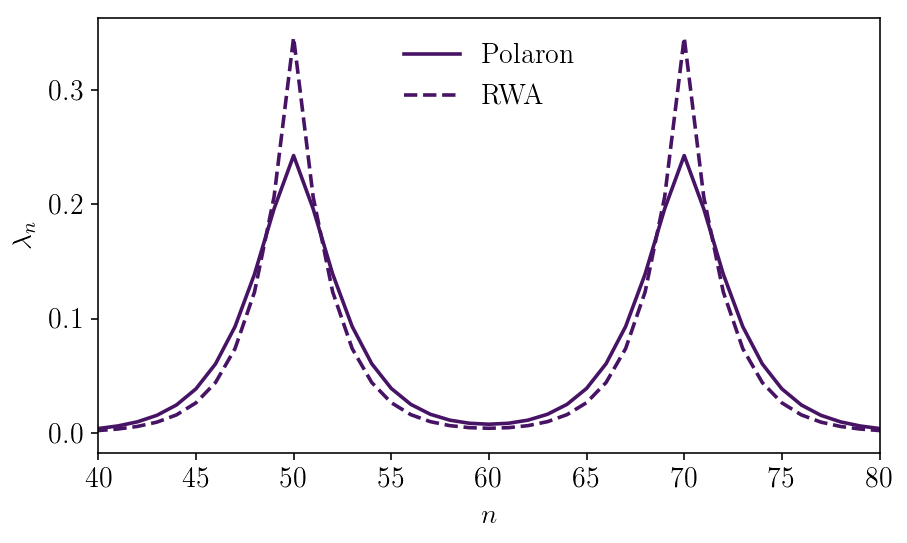

In [82]:
plt.rcParams['figure.figsize'] = 7, 4
plt.rcParams['lines.linewidth'] = 1.8
plt.rcParams['font.size'] = 14

palette = itertools.cycle(sns.color_palette("viridis", 20))
c1 = next(palette)
for n in range(10):
    next(palette)
    
c2 = next(palette)

g = 0.3
delta = 0.3
x = 20

deltar = analisis[x][delta][g][0]
J = analisis[x][delta][g][1]

vects_eff = eigen_eff[x][delta][g].vects
vects_rwa = eigen_rwa[x][delta][g].vects

v1 = vects_eff[:, 0]
v1_rwa = vects_rwa[:, 0]

f = f_f(deltar, J, g, x)

plt.plot([n for n in range(N)], -f_fn(v1[2:]), label = 'Polaron', c = c1)
plt.plot([n for n in range(N)], -f_fn(v1_rwa[2:]), label = 'RWA', c = c1, ls = 'dashed')

plt.ylabel(r'$\lambda_n$')
plt.xlabel(r'$n$')
plt.xlim(N // 2 + x / 2 - x, N // 2 + x / 2 + x)
plt.legend(frameon = False)

plt.savefig('figures/2q_bound_vn1.pdf', bbox_inches = 'tight')
plt.show()

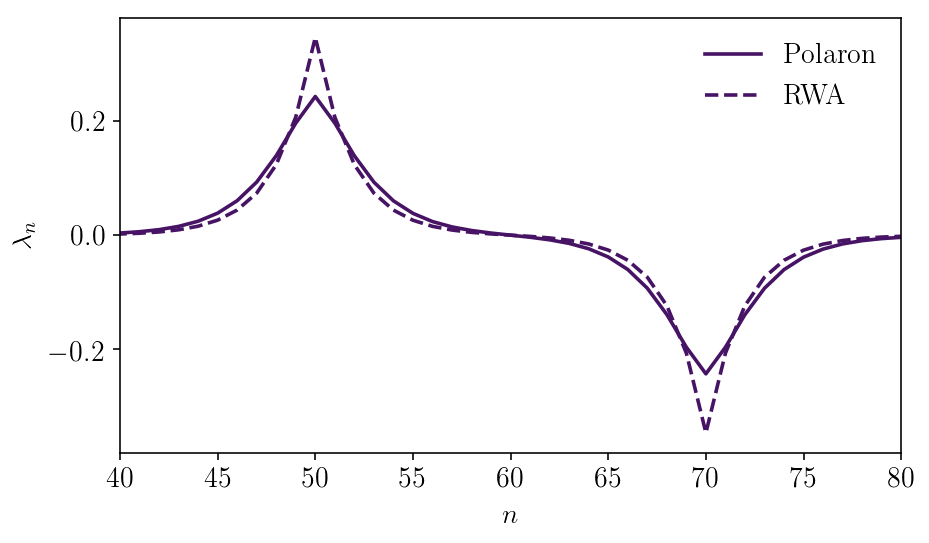

In [84]:
plt.rcParams['figure.figsize'] = 7, 4
plt.rcParams['lines.linewidth'] = 1.8
plt.rcParams['font.size'] = 14

palette = itertools.cycle(sns.color_palette("viridis", 20))
c1 = next(palette)
for n in range(10):
    next(palette)
    
c2 = next(palette)

g = 0.3
delta = 0.3
x = 20

deltar = analisis[x][delta][g][0]
J = analisis[x][delta][g][1]

vects_eff = eigen_eff[x][delta][g].vects
vects_rwa = eigen_rwa[x][delta][g].vects

v2 = vects_eff[:, 1]
v2_rwa = vects_rwa[:, 1]

f = f_f(deltar, J, g, x)

plt.plot([n for n in range(N)], f_fn(v2[2:]), label = 'Polaron', c = c1)
plt.plot([n for n in range(N)], -f_fn(v2_rwa[2:]), label = 'RWA', c = c1, ls = 'dashed')

plt.ylabel(r'$\lambda_n$')
plt.xlabel(r'$n$')
plt.xlim(N // 2 + x / 2 - x, N // 2 + x / 2 + x)
plt.legend(frameon = False)

plt.savefig('figures/2q_bound_vn2.pdf', bbox_inches = 'tight')
plt.show()

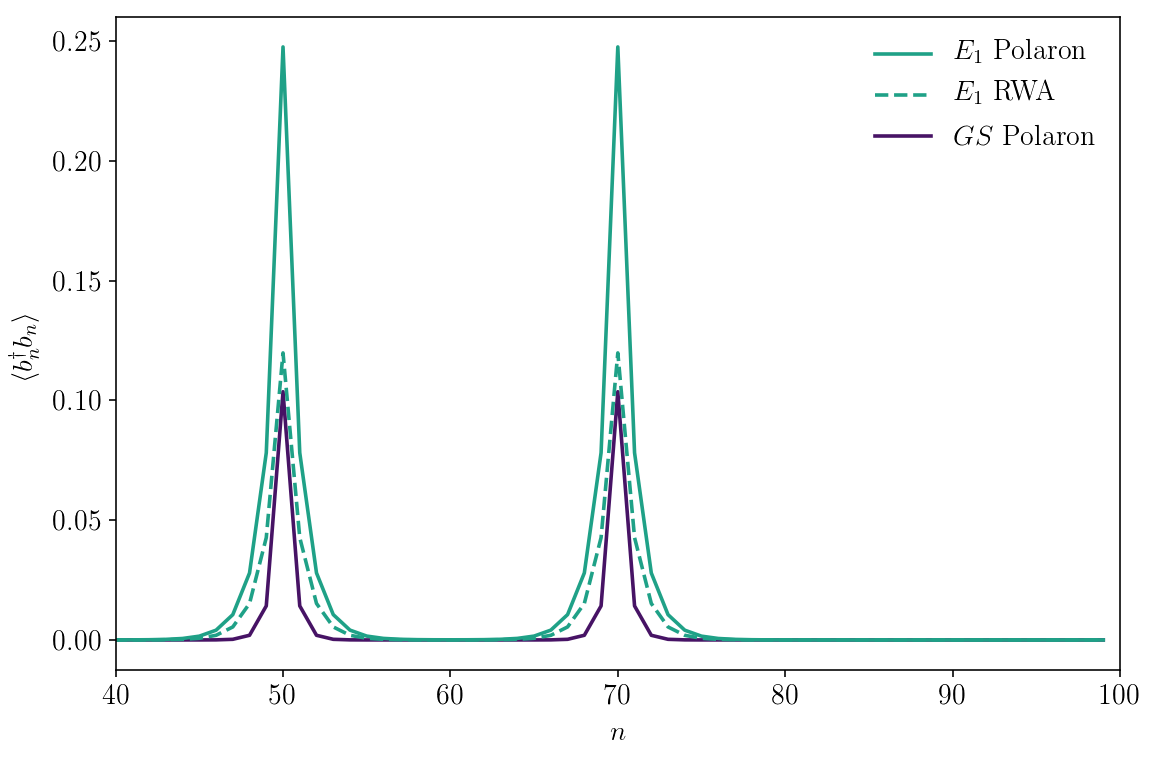

In [23]:
plt.rcParams['figure.figsize'] = 9, 6
plt.rcParams['lines.linewidth'] = 1.8
plt.rcParams['font.size'] = 14

palette = itertools.cycle(sns.color_palette("viridis", 20))
c1 = next(palette)
for n in range(10):
    next(palette)
    
c2 = next(palette)

g = 0.3
delta = 0.3
x = 20

deltar = analisis[x][delta][g][0]
J = analisis[x][delta][g][1]

vects_eff = eigen_eff[x][delta][g].vects
vects_rwa = eigen_rwa[x][delta][g].vects

v1 = vects_eff[:, 0]
v1_rwa = vects_rwa[:, 0]

f = f_f(deltar, J, g, x)

nphotons1 = numberofphotons(v1, f, deltar, J, x)
nphotons_gs = numberofphotons_GS(deltar, J, g, x)
nphotons1_rwa = numberofphotons_rwa(v1_rwa)

plt.plot([n for n in range(N)], nphotons1 , label = r'$E_1$' + ' Polaron', c = c2)
plt.plot([n for n in range(N)], nphotons1_rwa , label = r'$E_1$' + ' RWA', c = c2, ls = 'dashed')
plt.plot([n for n in range(N)], nphotons_gs , label = r'$GS$' + ' Polaron', c = c1, zorder = 0)

plt.ylabel(r'$\langle b_n^\dagger b_n\rangle $')
plt.xlabel(r'$n$')
plt.xlim(N // 2 + x / 2 - x, N // 2 + x / 2 + x + 20)
plt.legend(frameon = False)

plt.savefig('figures/2q_nphotons_bound_1.pdf', bbox_inches = 'tight')
plt.show()

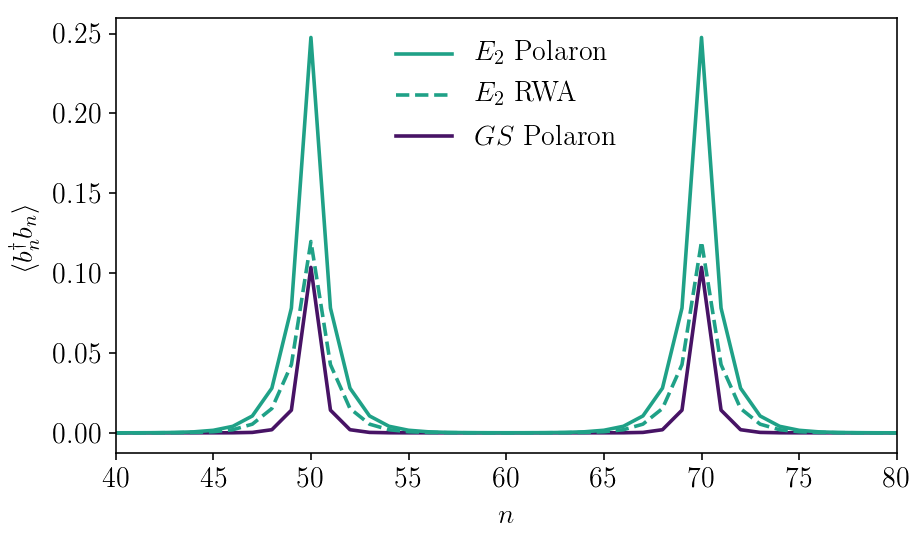

In [20]:
plt.rcParams['figure.figsize'] = 7, 4
plt.rcParams['lines.linewidth'] = 1.8
plt.rcParams['font.size'] = 14

palette = itertools.cycle(sns.color_palette("viridis", 20))
c1 = next(palette)
for n in range(10):
    next(palette)
    
c2 = next(palette)

g = 0.3
delta = 0.3
x = 20

deltar = analisis[x][delta][g][0]
J = analisis[x][delta][g][1]

vects_eff = eigen_eff[x][delta][g].vects
vects_rwa = eigen_rwa[x][delta][g].vects

v2 = vects_eff[:, 0]
v2_rwa = vects_rwa[:, 0]

f = f_f(deltar, J, g, x)

nphotons2 = numberofphotons(v2, f, deltar, J, x)
nphotons_gs = numberofphotons_GS(deltar, J, g, x)
nphotons2_rwa = numberofphotons_rwa(v2_rwa)

plt.plot([n for n in range(N)], nphotons1 , label = r'$E_2$' + ' Polaron', c = c2)
plt.plot([n for n in range(N)], nphotons1_rwa , label = r'$E_2$' + ' RWA', c = c2, ls = 'dashed')
plt.plot([n for n in range(N)], nphotons_gs , label = r'$GS$' + ' Polaron', c = c1, zorder = 0)

plt.ylabel(r'$\langle b_n^\dagger b_n\rangle $')
plt.xlabel(r'$n$')
plt.xlim(N // 2 + x / 2 - x, N // 2 + x / 2 + x)
plt.legend(frameon = False)

plt.savefig('figures/2q_nphotons_bound_2.pdf', bbox_inches = 'tight')
plt.show()

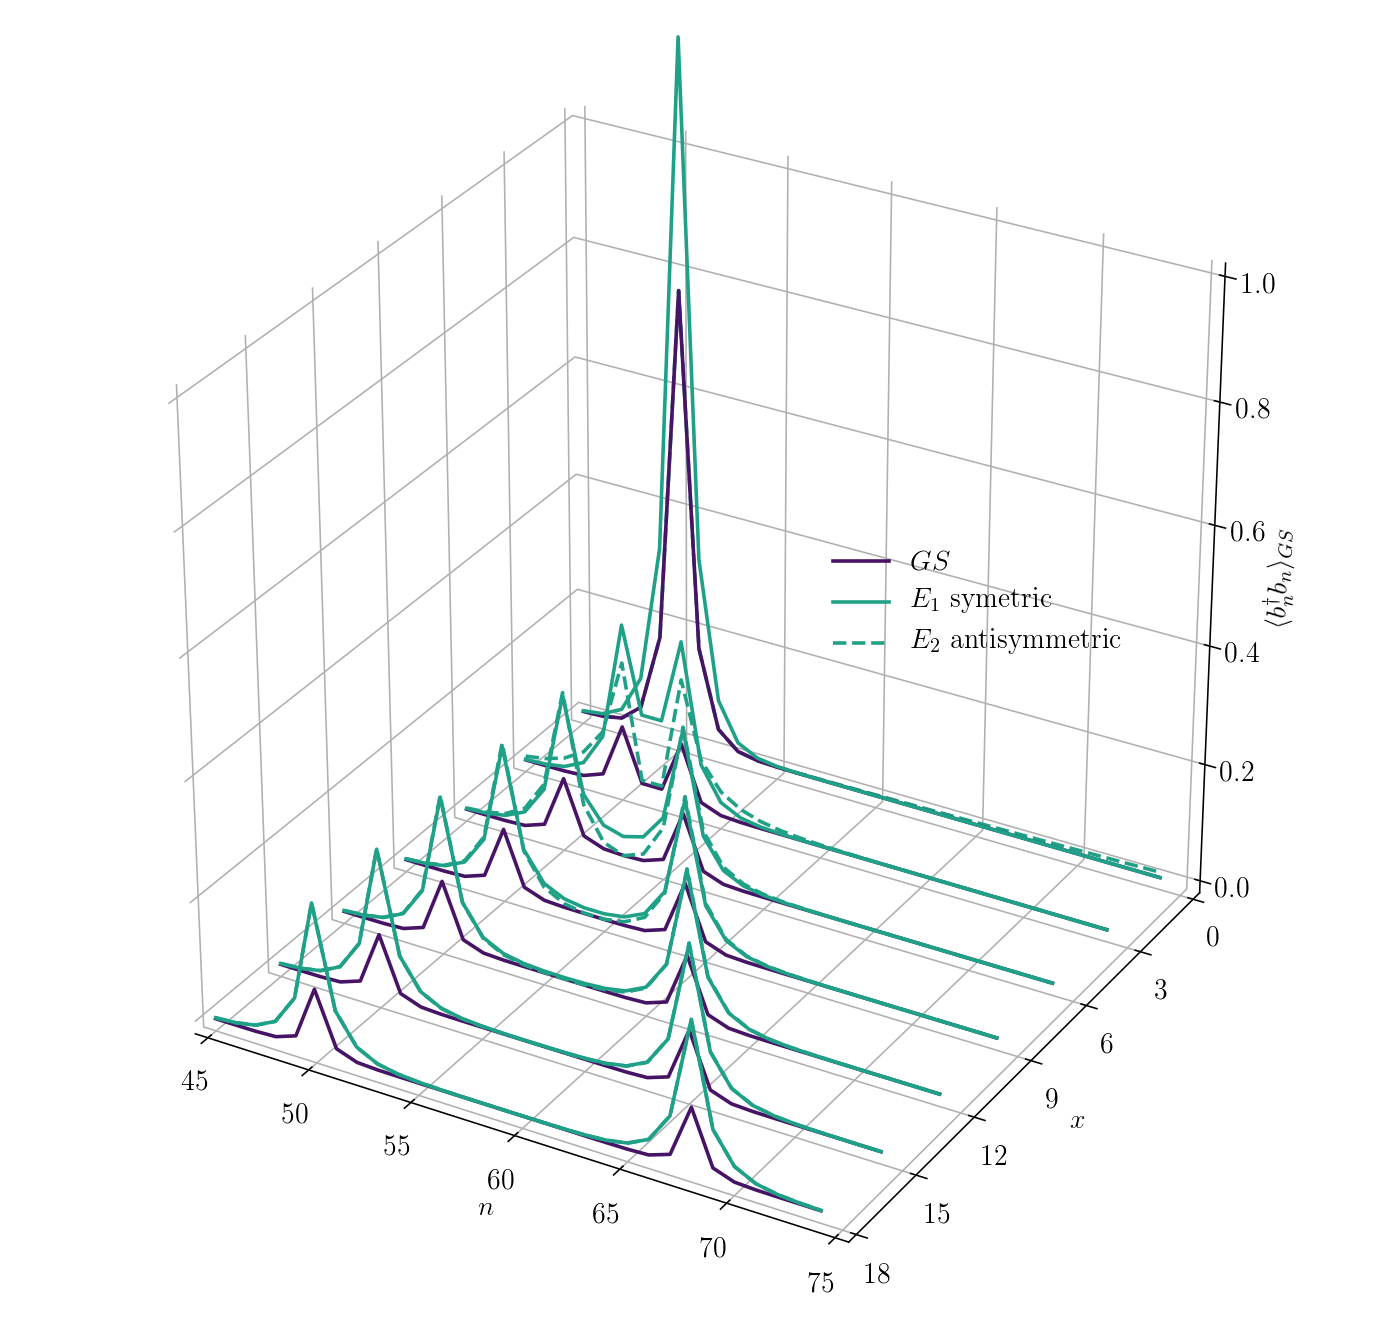

In [21]:
plt.rcParams['figure.figsize'] = 12, 12
plt.rcParams['lines.linewidth'] = 1.8
plt.rcParams['font.size'] = 14

palette = itertools.cycle(sns.color_palette("viridis", 20))
c1 = next(palette)
for n in range(10):
    next(palette)
    
c2 = next(palette)

from mpl_toolkits import mplot3d
fig = plt.figure()
ax = plt.axes(projection='3d')

delta = 0.3
g = 0.3

gen = [x for x, n in zip(analisis.keys(), range(len(analisis.keys()))) if n % 3 == 0]
#gen = [0, 2, 5, 9, 14, 20]

firsttime = True
for x in gen:
    deltar = analisis[x][delta][g][0]
    J = analisis[x][delta][g][1]
    
    vects = eigen_eff[x][delta][g].vects

    v1 = vects[:, 0]
    v2 = vects[:, 1]
    f = f_f(deltar, J, g, x)

    nphotons1 = numberofphotons(v1, f, deltar, J, x)
    nphotons2 = numberofphotons(v2, f, deltar, J, x)
    nphotons_gs = numberofphotons_GS(deltar, J, g, x)
    
    if firsttime:
        firsttime = False
        ax.plot([n for n in range(N // 2 - 5, N // 2 + 25)], [x for n in range(N // 2 - 5, N // 2 + 25)], nphotons_gs[N // 2 - 5: N // 2 + 25], c  = c1, label = r'$GS$')
        ax.plot([n for n in range(N // 2 - 5, N // 2 + 25)], [x for n in range(N // 2 - 5, N // 2 + 25)], nphotons1[N // 2 - 5: N // 2 + 25], c = c2, label = r'$E_1$' + ' symetric')
        ax.plot([n for n in range(N // 2 - 5, N // 2 + 25)], [x for n in range(N // 2 - 5, N // 2 + 25)], nphotons2[N // 2 - 5: N // 2 + 25], c = c2, ls = 'dashed', label = r'$E_2$' + ' antisymmetric', zorder = 0)
        
    else:
        ax.plot([n for n in range(N // 2 - 5, N // 2 + 25)], [x for n in range(N // 2 - 5, N // 2 + 25)], nphotons_gs[N // 2 - 5: N // 2 + 25], c  = c1)
        ax.plot([n for n in range(N // 2 - 5, N // 2 + 25)], [x for n in range(N // 2 - 5, N // 2 + 25)], nphotons1[N // 2 - 5: N // 2 + 25], c = c2)
        ax.plot([n for n in range(N // 2 - 5, N // 2 + 25)], [x for n in range(N // 2 - 5, N // 2 + 25)], nphotons2[N // 2 - 5: N // 2 + 25], c = c2, ls = 'dashed')
    
ax.set_zlabel(r'$\langle b_n^\dagger b_n\rangle_{GS} $')
ax.set_ylabel(r'$x$')
ax.set_xlabel(r'$n$')
ax.set_xlim(N // 2 - 5, N // 2 + 25)
ax.set_ylim(0, gen[-1])
ax.set_zlim(0, 1)
ax.set_yticks(gen)
#plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
#plt.title(r'$g = $' + str(g))
ax.invert_yaxis()
ax.legend(loc = (0.6, 0.5), frameon = False)

# make the panes transparent
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

#plt.savefig('figures/2q_nphotons_bound_with_x.pdf', bbox_inches = 'tight')
plt.show()

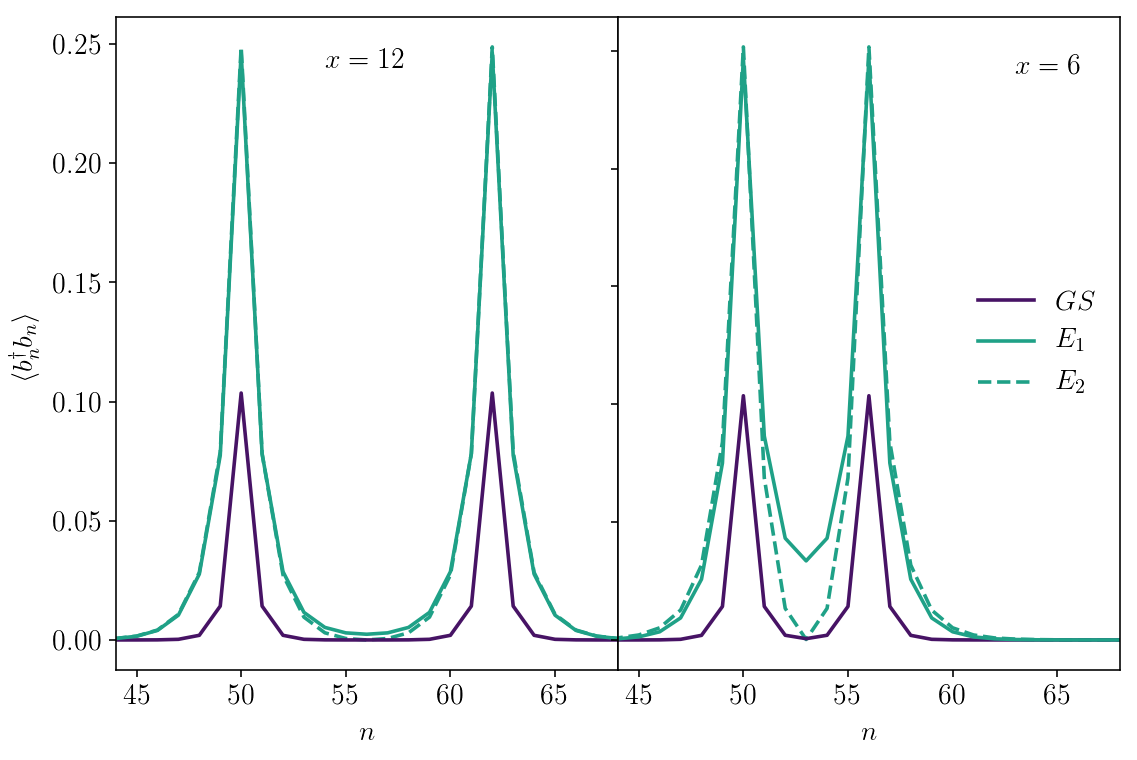

In [81]:
plt.rcParams['figure.figsize'] = 9, 6
plt.rcParams['lines.linewidth'] = 1.8
plt.rcParams['font.size'] = 14

palette = itertools.cycle(sns.color_palette("viridis", 20))
c1 = next(palette)
for n in range(10):
    next(palette)
    
c2 = next(palette)

plt.subplot(1, 2, 1)

delta = 0.3
g = 0.3
x = 12

deltar = analisis[x][delta][g][0]
J = analisis[x][delta][g][1]

vects = eigen_eff[x][delta][g].vects

v1 = vects[:, 0]
v2 = vects[:, 1]
f = f_f(deltar, J, g, x)

nphotons1 = numberofphotons(v1, f, deltar, J, x)
nphotons2 = numberofphotons(v2, f, deltar, J, x)
nphotons_gs = numberofphotons_GS(deltar, J, g, x)

plt.plot([n for n in range(N)], nphotons_gs, c  = c1, label = r'$GS$')
plt.plot([n for n in range(N)], nphotons1, c = c2, label = r'$E_1$' + ' symetric')
plt.plot([n for n in range(N)], nphotons2, c = c2, ls = 'dashed', label = r'$E_2$' + ' antisymmetric', zorder = 0)

plt.text(54, 0.24, r'$x = 12$')
plt.ylabel(r'$\langle b_n^\dagger b_n\rangle $')
plt.xlabel(r'$n$')
plt.xlim(N // 2 + x / 2 - x, N // 2 + x / 2 + x)
plt.yticks(np.linspace(0.00, 0.25, 6))
#plt.legend(frameon = False)

plt.subplot(1, 2, 2)

delta = 0.3
g = 0.3
x = 6

deltar = analisis[x][delta][g][0]
J = analisis[x][delta][g][1]

vects = eigen_eff[x][delta][g].vects

v1 = vects[:, 0]
v2 = vects[:, 1]
f = f_f(deltar, J, g, x)

nphotons1 = numberofphotons(v1, f, deltar, J, x)
nphotons2 = numberofphotons(v2, f, deltar, J, x)
nphotons_gs = numberofphotons_GS(deltar, J, g, x)

plt.plot([n for n in range(N)], nphotons_gs, c  = c1, label = r'$GS$')
plt.plot([n for n in range(N)], nphotons1, c = c2, label = r'$E_1$')
plt.plot([n for n in range(N)], nphotons2, c = c2, ls = 'dashed', label = r'$E_2$', zorder = 0)

plt.text(63, 0.24, r'$x = 6$')
#plt.ylabel(r'$\langle b_n^\dagger b_n\rangle $')
plt.xlabel(r'$n$')
plt.xlim(44, 68)
plt.legend(loc = 'center right', frameon = False)
plt.yticks(np.linspace(0.00, 0.25, 6), [])
#plt.xticks(np.arange(47, 68, 3))

plt.subplots_adjust(wspace = 0)

plt.savefig('figures/2q_nphotons_bound_with_x.pdf', bbox_inches = 'tight')
plt.show()